# Car Price Prediction


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
fuel=df['fueltype'].unique()
fuel

array(['gas', 'diesel'], dtype=object)

In [ ]:
carbody=df['carbody'].unique()
carbody

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Checking whether there any null values

In [ ]:
nu_val=df.isna().sum()
nu_val

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Classifying columns based on numerical and categorical

In [ ]:
num_data=[]
cat_data=[]
for name,data in df.items():
  if data.dtype == 'object':
    cat_data.append(name)
  else:
    num_data.append(name)
print(num_data,cat_data)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### Convert categorical data into numerical data 

In [ ]:
df[cat_data]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
for i in cat_data:
  print(i,':',len(df[i].unique()))

CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


### Converting categorical data into Numerical data by label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in cat_data:
  s=i+'_num'
  df[s] = label_encoder.fit_transform(df[i])

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarName_num', 'fueltype_num', 'aspiration_num',
       'doornumber_num', 'carbody_num', 'drivewheel_num', 'enginelocation_num',
       'enginetype_num', 'cylindernumber_num', 'fuelsystem_num'],
      dtype='object')

In [ ]:
print(df.dtypes)

car_ID                  int64
symboling               int64
CarName                object
fueltype               object
aspiration             object
doornumber             object
carbody                object
drivewheel             object
enginelocation         object
wheelbase             float64
carlength             float64
carwidth              float64
carheight             float64
curbweight              int64
enginetype             object
cylindernumber         object
enginesize              int64
fuelsystem             object
boreratio             float64
stroke                float64
compressionratio      float64
horsepower              int64
peakrpm                 int64
citympg                 int64
highwaympg              int64
price                 float64
CarName_num             int64
fueltype_num            int64
aspiration_num          int64
doornumber_num          int64
carbody_num             int64
drivewheel_num          int64
enginelocation_num      int64
enginetype

In [ ]:
num_data=[]
cat_data=[]
for name,data in df.items():
  if data.dtype == 'object':
    cat_data.append(name)
  else:
    num_data.append(name)
print(num_data,cat_data)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_num', 'fueltype_num', 'aspiration_num', 'doornumber_num', 'carbody_num', 'drivewheel_num', 'enginelocation_num', 'enginetype_num', 'cylindernumber_num', 'fuelsystem_num'] ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
df[num_data]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CarName_num,fueltype_num,aspiration_num,doornumber_num,carbody_num,drivewheel_num,enginelocation_num,enginetype_num,cylindernumber_num,fuelsystem_num
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,2,1,0,1,0,2,0,0,2,5
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,3,1,0,1,0,2,0,0,2,5
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,1,0,1,2,2,0,5,3,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,4,1,0,0,3,1,0,3,2,5
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,139,1,0,0,3,2,0,3,2,5
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,138,1,1,0,3,2,0,3,2,5
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,140,1,0,0,3,2,0,5,3,5
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,142,0,1,0,3,2,0,3,3,3


# Working with another data set

In [2]:
used_car_df=pd.read_csv("used_cars_train_data.csv")
used_car_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
used_car_df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4]:
df2=used_car_df.copy()

In [5]:
df2.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [6]:
df2.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

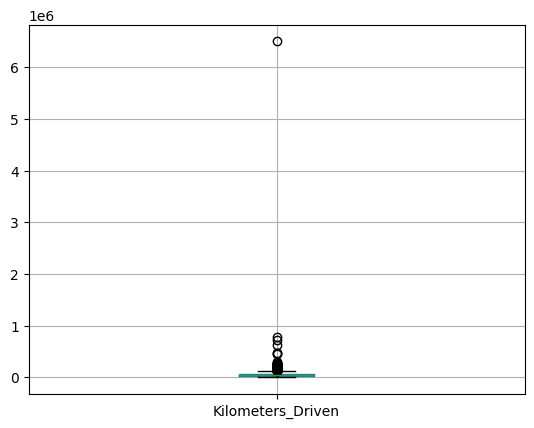

In [7]:
boxplot = df2.boxplot(column=['Kilometers_Driven'])  

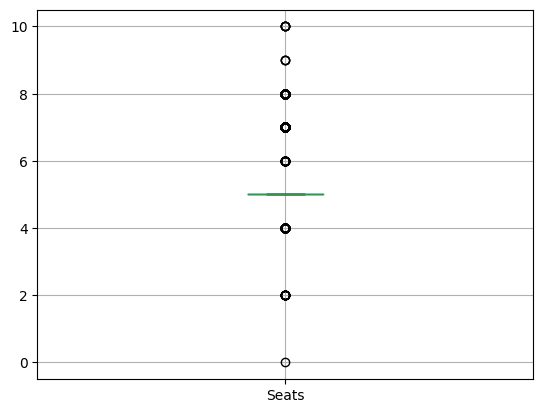

In [8]:
boxplot = df2.boxplot(column=['Seats'])  


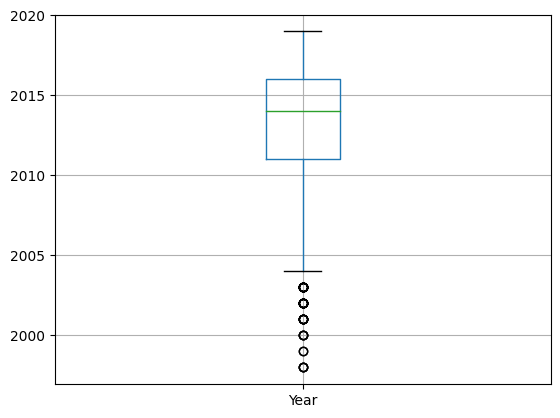

In [9]:
boxplot = df2.boxplot(column=['Year'])  


In [10]:
df2['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

<AxesSubplot:title={'center':'Owner Type'}, ylabel='None'>

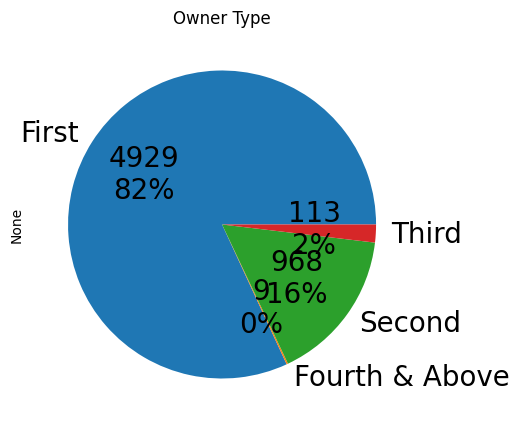

In [11]:

def label_function(val):
    return f'{val / 100 * len(df2):.0f}\n{val:.0f}%'
fig, (ax1) = plt.subplots(figsize=(10, 5))
df2.groupby('Owner_Type').size().plot(title='Owner Type',kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  ax=ax1)

In [12]:
df2['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

<AxesSubplot:title={'center':'Year'}, ylabel='None'>

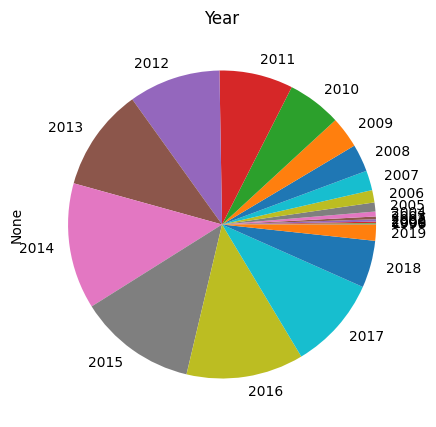

In [13]:


fig, (ax1) = plt.subplots(figsize=(10, 5))
df2.groupby('Year').size().plot(title='Year',kind='pie', textprops={'fontsize': 10},
                                  ax=ax1)

### Data Cleaning ,Converting string to int

In [14]:
used_car_df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

### Dividing into training and testing datasets

In [260]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :-1], 
                                                    df2.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

###The first column is the index for each data point and hence we can simply remove it.

In [16]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### As we have cars with names but not with company names let's create new column for company i.e is brand

In [17]:
new_col_train = X_train["Name"].str.split(" ", expand = True)
new_col_test = X_test["Name"].str.split(" ", expand = True)

In [18]:
X_train["Brand"]=new_col_train[0]
X_test["Brand"]=new_col_test[0]

Text(0, 0.5, 'Count of cars')

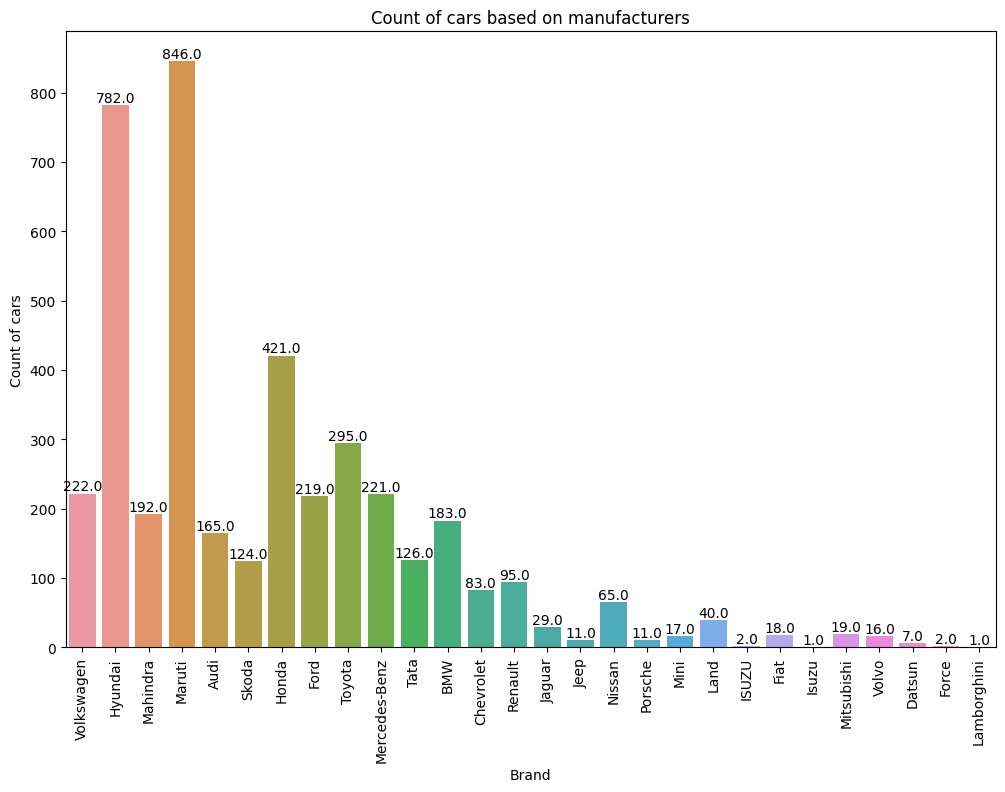

In [19]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

In [20]:
X_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Brand                 object
dtype: object

### Notice that Mileage, Engine,Power ,Prices are not int or float, lets clean data and convert them

#### Mileage

In [21]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

### Engine

In [22]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

#### Power

In [23]:
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

####New_price


In [24]:
X_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
4201,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2011,77000,Diesel,Manual,First,22.07,1199.0,73.9,5.0,NaN,Volkswagen
4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36,1197.0,78.9,5.0,NaN,Hyundai
1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.10,2179.0,140.0,7.0,NaN,Mahindra
4020,Maruti Swift VDI BSIV,Kolkata,2013,115195,Diesel,Manual,First,25.20,1248.0,74.0,5.0,NaN,Maruti
3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47,1198.0,73.9,5.0,NaN,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.6,5.0,NaN,Nissan
5191,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.0,7.0,NaN,Ford
5226,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.0,7.0,NaN,Mahindra
5390,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.6,5.0,NaN,Honda


In [25]:
X_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Brand                 object
dtype: object

#### Let's Check is there any relation between some of the numerical columns

<AxesSubplot:xlabel='Mileage', ylabel='New_Price'>

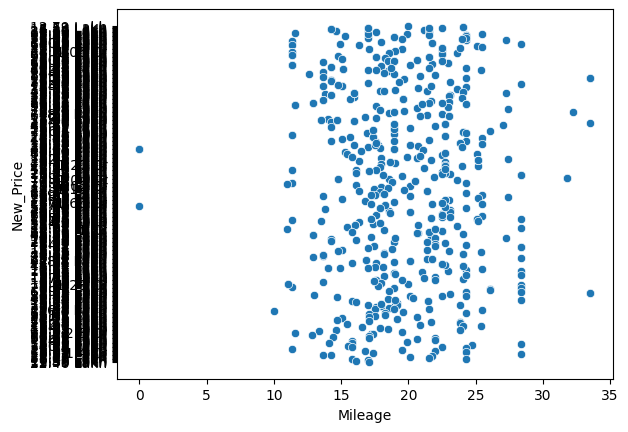

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.scatterplot(data=X_train, x="Mileage", y="New_Price")

<AxesSubplot:xlabel='Mileage', ylabel='Engine'>

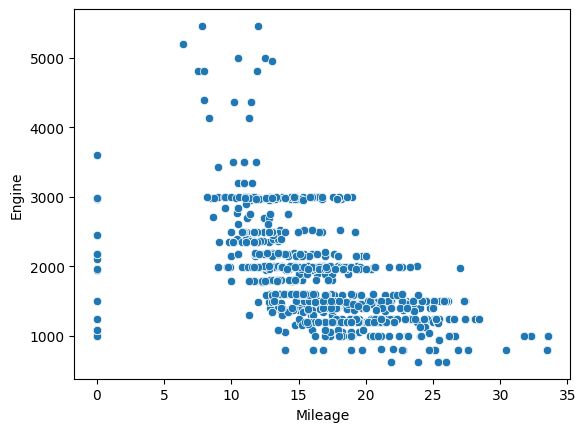

In [27]:
sns.scatterplot(data=X_train, x="Mileage", y="Engine")


<AxesSubplot:xlabel='Mileage', ylabel='Power'>

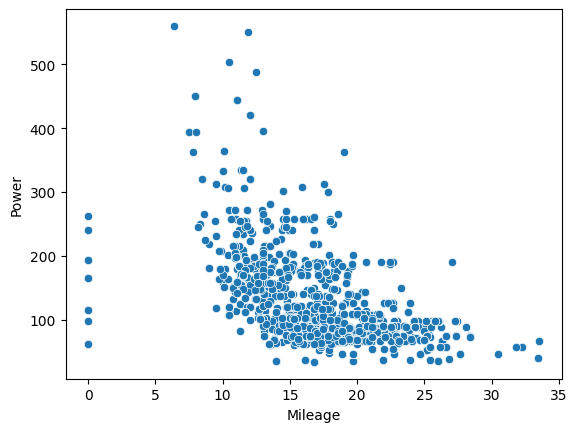

In [28]:
sns.scatterplot(data=X_train, x="Mileage", y="Power")


<AxesSubplot:xlabel='Engine', ylabel='Power'>

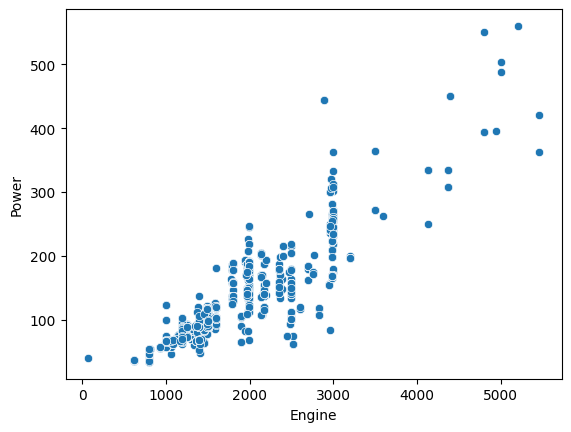

In [29]:
sns.scatterplot(data=X_train, x="Engine", y="Power")


### Listing all Brands of cars

In [30]:
s=list(X_train['Brand'].unique())
s.sort()
print(len(s),s)

28 ['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


### Checking for Null Values

In [31]:
X_train.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 24
Power                  92
Seats                  28
New_Price            3633
Brand                   0
dtype: int64

### Filling the missing values with mean of their respective column As they are numerical

In [32]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)


In [33]:
X_train.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            3633
Brand                   0
dtype: int64

#### lets drop New Price column because it doesnot have impact on the 

In [34]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

#### We can use this transformed data in furthur process, so storing in X_train_org

In [35]:
X_train_org=X_train.copy()
X_test_org=X_test.copy()

#### Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [36]:
X_train = pd.get_dummies(X_train,columns = ["Brand", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test = pd.get_dummies(X_test,columns = ["Brand", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [37]:
X_train.isna().sum()

Name                         0
Location                     0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Brand_BMW                    0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Force                  0
Brand_Ford                   0
Brand_Honda                  0
Brand_Hyundai                0
Brand_ISUZU                  0
Brand_Isuzu                  0
Brand_Jaguar                 0
Brand_Jeep                   0
Brand_Lamborghini            0
Brand_Land                   0
Brand_Mahindra               0
Brand_Maruti                 0
Brand_Mercedes-Benz          0
Brand_Mini                   0
Brand_Mitsubishi             0
Brand_Nissan                 0
Brand_Porsche                0
Brand_Renault                0
Brand_Skoda                  0
Brand_Tata                   0
Brand_To

#### If some of the categorical columns doesnot created in test dataset because of its less count of unique values,lets fill them

In [38]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [39]:
X_train_df=X_train.copy()
X_test_df=X_test.copy()

In [40]:
X_train.drop(["Name"], axis = 1, inplace = True)
X_test.drop(["Name"], axis = 1, inplace = True)

In [41]:
X_train.drop(["Location"], axis = 1, inplace = True)
X_test.drop(["Location"], axis = 1, inplace = True)

#### Scaling the data

In [42]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

#### Training and testing with  Linear Regression Model

*   List item
*   List item



In [43]:
X_test[0]

array([-0.12244901,  0.30110916,  1.14767323, -0.62120433, -0.73483645,
       -0.34558452, -0.21309488, -0.14176337, -0.0407957 , -0.06550437,
       -0.02179327, -0.23416287, -0.33320145, -0.47741166, -0.02179327,
       -0.01540834, -0.08325363, -0.05116445, -0.01540834, -0.09790521,
       -0.21851617,  1.99497003, -0.23528859, -0.06365122, -0.06730736,
       -0.12518068, -0.05116445, -0.15188631, -0.1741415 , -0.1755832 ,
       -0.27439664, -0.23584986, -0.0617434 ,  0.94030216, -0.01540834,
       -0.04361762, -0.9190054 ,  0.63145735, -0.03447046, -0.4356339 ,
       -0.14176337])

In [44]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7008908549416724

#### Training and testing with  Random Forest Model

In [45]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8854444347642461

### Let's Manually check these predictions

In [46]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((y_pred), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,4.09,5.75,1.66,28.81
1,13.04,10.08,-2.96,29.37
2,8.26,7.85,-0.41,5.26
3,2.36,2.40,0.04,1.79
4,3.20,1.60,-1.60,99.84
...,...,...,...,...
1801,11.54,9.47,-2.07,21.91
1802,2.78,3.20,0.42,13.01
1803,4.40,4.25,-0.15,3.52
1804,5.61,6.48,0.87,13.35


In [47]:
X_train_df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Chevrolet,...,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
count,4213,4213,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,...,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00,4213.00
unique,1592,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.40,57529.23,18.15,1622.55,113.00,5.28,0.04,0.02,...,0.05,0.00,0.53,0.00,0.00,0.46,0.71,0.00,0.16,0.02
std,NaN,NaN,3.24,38099.56,4.57,603.01,53.08,0.80,0.20,0.14,...,0.22,0.06,0.50,0.02,0.04,0.50,0.45,0.03,0.37,0.14
min,NaN,NaN,1998.00,600.00,0.00,72.00,34.20,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,2011.00,34000.00,15.10,1197.00,78.90,5.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,NaN,2014.00,52827.00,18.20,1495.00,98.60,5.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,NaN,NaN,2016.00,72100.00,21.10,1978.00,138.03,5.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00


In [48]:

from tensorflow import keras


# # Assuming 'X' contains the feature matrix and 'y' contains the target variable (car prices)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the input features
# scaler = StandardScale = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)


# new_data = np.array([[...]])  # Replace '...' with the input feature values for prediction
# new_data_scaled = scaler.transform(new_data)
# predictions = model.predict(new_data_scaled)

Epoch 1/50
106/106 [==============================] - 1s 5ms/step - loss: 103.3152 - val_loss: 57.7485
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 32.9254 - val_loss: 42.4357
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 21.9922 - val_loss: 35.6597
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 17.4264 - val_loss: 32.6698
Epoch 5/50
106/106 [==============================] - 0s 2ms/step - loss: 15.3112 - val_loss: 30.8750
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 13.6580 - val_loss: 30.5655
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 12.7242 - val_loss: 28.7371
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 12.1311 - val_loss: 27.8783
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 11.6478 - val_loss: 27.4207
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 10.963

In [49]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)


Epoch 1/50
106/106 [==============================] - 2s 3ms/step - loss: 70.3997 - val_loss: 44.2610
Epoch 2/50
106/106 [==============================] - 0s 3ms/step - loss: 20.9874 - val_loss: 34.2041
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 14.4442 - val_loss: 29.5294
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 12.7667 - val_loss: 29.0664
Epoch 5/50
106/106 [==============================] - 0s 3ms/step - loss: 11.7415 - val_loss: 27.7039
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 10.4983 - val_loss: 26.9681
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 10.8852 - val_loss: 26.7612
Epoch 8/50
106/106 [==============================] - 0s 3ms/step - loss: 10.0379 - val_loss: 26.6727
Epoch 9/50
106/106 [==============================] - 0s 3ms/step - loss: 10.0355 - val_loss: 26.2305
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 9.1235 

In [50]:
# new_data = np.array([[...]])  # Replace '...' with the input feature values for prediction
# new_data_scaled = standardScaler.transform()
predictions = model.predict(X_test)

57/57 [==============================] - 0s 2ms/step


In [51]:
print(predictions)

[[ 4.6023045]
 [10.427984 ]
 [ 8.616682 ]
 ...
 [ 4.368672 ]
 [ 4.7666316]
 [ 7.362202 ]]


In [52]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((predictions), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,4.60,5.75,1.15,19.96
1,10.43,10.08,-0.35,3.45
2,8.62,7.85,-0.77,9.77
3,2.29,2.40,0.11,4.79
4,2.92,1.60,-1.32,82.80
...,...,...,...,...
1801,11.11,9.47,-1.64,17.32
1802,3.67,3.20,-0.47,14.68
1803,4.37,4.25,-0.12,2.79
1804,4.77,6.48,1.71,26.44


In [53]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)


Epoch 1/50
106/106 [==============================] - 1s 3ms/step - loss: 118.4946 - val_loss: 52.1392
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 28.3365 - val_loss: 39.7988
Epoch 3/50
106/106 [==============================] - 1s 8ms/step - loss: 19.4137 - val_loss: 31.8917
Epoch 4/50
106/106 [==============================] - 1s 6ms/step - loss: 15.2178 - val_loss: 29.9641
Epoch 5/50
106/106 [==============================] - 0s 3ms/step - loss: 13.4402 - val_loss: 27.6877
Epoch 6/50
106/106 [==============================] - 0s 3ms/step - loss: 11.8626 - val_loss: 27.8096
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 11.5752 - val_loss: 27.1299
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 11.4846 - val_loss: 26.2367
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 10.4200 - val_loss: 27.3314
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 9.9925

In [54]:
predictions = model.predict(X_test)

57/57 [==============================] - 0s 979us/step


In [55]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((predictions), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,4.35,5.75,1.40,24.27
1,10.08,10.08,0.00,0.02
2,8.13,7.85,-0.28,3.58
3,2.33,2.40,0.07,2.94
4,2.84,1.60,-1.24,77.79
...,...,...,...,...
1801,10.73,9.47,-1.26,13.27
1802,2.94,3.20,0.26,8.22
1803,4.17,4.25,0.08,1.89
1804,5.85,6.48,0.63,9.71


### Model 2

#### Instead of one hot encoding lets do label encoding for brand column

In [261]:
X_train2=X_train_org.copy()
X_test2=X_test_org.copy()

In [262]:
X_train2.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand'],
      dtype='object')

In [263]:
X_train2.drop(["Name"], axis = 1, inplace = True)
X_test2.drop(["Name"], axis = 1, inplace = True)
X_train2.drop(["Location"], axis = 1, inplace = True)
X_test2.drop(["Location"], axis = 1, inplace = True)

#### Trying with sorting and label encoding

In [264]:
y_train2=y_train.copy()
y_test2=y_test.copy()

In [265]:
X_test2

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
2868,2013,69000,Diesel,Manual,First,23.40,1248.00,74.00,5.00,Maruti
5924,2017,26741,Diesel,Manual,First,15.40,1997.00,120.00,7.00,Mahindra
3764,2014,86000,Diesel,Manual,First,15.10,2179.00,140.00,7.00,Mahindra
4144,2016,52000,Diesel,Manual,Second,25.00,1396.00,69.01,5.00,Tata
2780,2009,100000,Petrol,Manual,First,0.00,1622.55,113.00,5.28,Hyundai
...,...,...,...,...,...,...,...,...,...,...
2576,2014,91586,Diesel,Automatic,Second,11.18,2696.00,184.00,7.00,Mahindra
1294,2009,55005,Petrol,Manual,First,12.80,1622.55,113.00,5.28,Honda
1876,2014,48800,Petrol,Manual,First,19.10,1197.00,85.80,5.00,Maruti
1432,2017,25095,Petrol,Manual,First,18.16,1196.00,86.80,5.00,Ford


In [266]:
y_train2.isna().sum()

0

In [267]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your dataframe and 'column_name' is the name of the categorical column

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the categorical column and transform the column values
X_train2['Brand'] = label_encoder.fit_transform(X_train2['Brand'])
X_train2['Fuel_Type'] = label_encoder.fit_transform(X_train2['Fuel_Type'])
X_train2['Transmission'] = label_encoder.fit_transform(X_train2['Transmission'])
X_train2['Owner_Type'] = label_encoder.fit_transform(X_train2['Owner_Type'])

X_test2['Brand'] = label_encoder.fit_transform(X_test2['Brand'])
X_test2['Fuel_Type'] = label_encoder.fit_transform(X_test2['Fuel_Type'])
X_test2['Transmission'] = label_encoder.fit_transform(X_test2['Transmission'])
X_test2['Owner_Type'] = label_encoder.fit_transform(X_test2['Owner_Type'])


In [268]:
X_train2

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,1,1,0,22.07,1199.00,73.90,5.00,26
4383,2016,19947,4,1,0,20.36,1197.00,78.90,5.00,8
1779,2014,70963,1,1,0,15.10,2179.00,140.00,7.00,15
4020,2013,115195,1,1,0,25.20,1248.00,74.00,5.00,16
3248,2011,58752,4,1,0,16.47,1198.00,73.90,5.00,26
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,4,0,0,17.97,1498.00,99.60,5.00,20
5191,2019,9000,1,0,0,12.62,2198.00,158.00,7.00,6
5226,2013,140000,1,1,2,15.10,2179.00,140.00,7.00,15
5390,2014,76414,1,1,0,25.80,1498.00,98.60,5.00,7


In [269]:
X_test2

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
2868,2013,69000,1,1,0,23.40,1248.00,74.00,5.00,15
5924,2017,26741,1,1,0,15.40,1997.00,120.00,7.00,14
3764,2014,86000,1,1,0,15.10,2179.00,140.00,7.00,14
4144,2016,52000,1,1,2,25.00,1396.00,69.01,5.00,24
2780,2009,100000,4,1,0,0.00,1622.55,113.00,5.28,10
...,...,...,...,...,...,...,...,...,...,...
2576,2014,91586,1,0,2,11.18,2696.00,184.00,7.00,14
1294,2009,55005,4,1,0,12.80,1622.55,113.00,5.28,9
1876,2014,48800,4,1,0,19.10,1197.00,85.80,5.00,15
1432,2017,25095,4,1,0,18.16,1196.00,86.80,5.00,8


In [270]:
standardScaler = StandardScaler()
standardScaler.fit(X_train2)
X_train2 = standardScaler.transform(X_train2)
# y_train2 = standardScaler.transform(y_train2)
X_test2 = standardScaler.transform(X_test2)
# y_test2 = standardScaler.transform(y_test2)

In [271]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
r2_score(y_test2, y_pred2)

0.8714479525649305

In [272]:
linearRegression = LinearRegression()
linearRegression.fit(X_train2, y_train2)
y_pred2 = linearRegression.predict(X_test2)
r2_score(y_test2, y_pred2)

0.5652976122542962

In [273]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((y_pred2), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test2 = y_test2.reset_index(drop=True)
df_ev['Actual Price'] = (y_test2)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,3.43,5.75,2.32,40.34
1,14.12,10.08,-4.04,40.12
2,12.72,7.85,-4.87,62.03
3,6.10,2.40,-3.70,154.36
4,5.87,1.60,-4.27,266.95
...,...,...,...,...
1801,22.01,9.47,-12.54,132.38
1802,4.21,3.20,-1.01,31.65
1803,4.16,4.25,0.09,2.02
1804,7.89,6.48,-1.41,21.83


In [274]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test2, y_test2)


Epoch 1/50
106/106 [==============================] - 2s 3ms/step - loss: 79.6944 - val_loss: 41.1235
Epoch 2/50
106/106 [==============================] - 1s 5ms/step - loss: 20.1337 - val_loss: 35.6212
Epoch 3/50
106/106 [==============================] - 1s 5ms/step - loss: 17.5451 - val_loss: 35.7321
Epoch 4/50
106/106 [==============================] - 0s 3ms/step - loss: 15.7048 - val_loss: 32.1940
Epoch 5/50
106/106 [==============================] - 0s 3ms/step - loss: 14.6135 - val_loss: 31.0331
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 13.6377 - val_loss: 30.7512
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 14.3978 - val_loss: 31.1050
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 12.9757 - val_loss: 29.6373
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 12.2407 - val_loss: 30.1360
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 11.9008

In [275]:
predictions = model.predict(X_test2)

57/57 [==============================] - 0s 982us/step


In [276]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((predictions), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test2 = y_test2.reset_index(drop=True)
df_ev['Actual Price'] = (y_test2)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,4.37,5.75,1.38,24.02
1,12.20,10.08,-2.12,21.06
2,9.28,7.85,-1.43,18.26
3,4.14,2.40,-1.74,72.30
4,1.60,1.60,-0.00,0.07
...,...,...,...,...
1801,15.26,9.47,-5.79,61.13
1802,2.12,3.20,1.08,33.87
1803,4.56,4.25,-0.31,7.18
1804,7.18,6.48,-0.70,10.84


#### Implementing with polynomial

In [284]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' contains the feature matrix and 'y' contains the target variable (car prices)

# Create polynomial features
degree = 5  # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train2)
X_poly_test2 = poly_features.fit_transform(X_test2)

# Create and train the linear regression model with polynomial features
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train2)

# Predict car prices using the trained model
y_pred = poly_regression.predict(X_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y_train2, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train2, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


Mean Squared Error (MSE): 1.4510768241333845
Root Mean Squared Error (RMSE): 1.2046065017811354
R-squared (R^2) Score: 0.9884898937502142


### Model 3

In [619]:
X_train3=X_train_org.copy()
X_test3=X_test_org.copy()

In [620]:
X_train3.drop(["Name"], axis = 1, inplace = True)
X_test3.drop(["Name"], axis = 1, inplace = True)
X_train3.drop(["Location"], axis = 1, inplace = True)
X_test3.drop(["Location"], axis = 1, inplace = True)

In [621]:
X_train3

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,Diesel,Manual,First,22.07,1199.00,73.90,5.00,Volkswagen
4383,2016,19947,Petrol,Manual,First,20.36,1197.00,78.90,5.00,Hyundai
1779,2014,70963,Diesel,Manual,First,15.10,2179.00,140.00,7.00,Mahindra
4020,2013,115195,Diesel,Manual,First,25.20,1248.00,74.00,5.00,Maruti
3248,2011,58752,Petrol,Manual,First,16.47,1198.00,73.90,5.00,Volkswagen
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,Petrol,Automatic,First,17.97,1498.00,99.60,5.00,Nissan
5191,2019,9000,Diesel,Automatic,First,12.62,2198.00,158.00,7.00,Ford
5226,2013,140000,Diesel,Manual,Second,15.10,2179.00,140.00,7.00,Mahindra
5390,2014,76414,Diesel,Manual,First,25.80,1498.00,98.60,5.00,Honda


In [622]:
X_train_group=pd.DataFrame(X_train3['Brand'])
X_train_group['Price']=y_train

In [623]:
X_train_group

,Brand,Price
4201,Volkswagen,2.90
4383,Hyundai,4.50
1779,Mahindra,7.83
4020,Maruti,3.85
3248,Volkswagen,3.32
...,...,...
3772,Nissan,6.75
5191,Ford,32.90
5226,Mahindra,9.00
5390,Honda,4.95


#### hashmap:{ Brand --> Normalized price }

In [624]:

# grouped = df.groupby('group_column')[mean_column].mean()
df_grouped=X_train_group.groupby('Brand')['Price'].mean()
# Create a hashmap (dictionary) with the group values as keys and mean values as values
hashmap = dict(zip(df_grouped.index, df_grouped.values))

# Print the hashmap
print(hashmap)

{'Audi': 26.365515151515154, 'BMW': 24.951639344262293, 'Chevrolet': 3.0320481927710845, 'Datsun': 3.0614285714285714, 'Fiat': 3.453888888888889, 'Force': 8.0, 'Ford': 7.203150684931507, 'Honda': 5.384560570071259, 'Hyundai': 5.259232736572891, 'ISUZU': 12.045, 'Isuzu': 20.0, 'Jaguar': 37.49413793103448, 'Jeep': 18.69272727272727, 'Lamborghini': 120.0, 'Land': 40.388, 'Mahindra': 7.984739583333333, 'Maruti': 4.578404255319149, 'Mercedes-Benz': 25.92149321266968, 'Mini': 27.226470588235294, 'Mitsubishi': 9.572631578947368, 'Nissan': 4.896307692307692, 'Porsche': 53.190909090909095, 'Renault': 5.849263157894736, 'Skoda': 7.714838709677419, 'Tata': 3.3861904761904764, 'Toyota': 11.696474576271186, 'Volkswagen': 5.414189189189189, 'Volvo': 19.435}


#### replacing  Brand names with their mean price

In [625]:
# Iterate through the DataFrame and update the column values
for index, row in X_test3.iterrows():
    current_value = row['Brand']
    if current_value not in hashmap:
        X_test3.at[index, 'Brand'] = float(5.5) ##if not found in hashmap
        continue
    new_value = hashmap[current_value]
    X_test3.at[index, 'Brand'] = float(new_value)
X_test3


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
2868,2013,69000,Diesel,Manual,First,23.40,1248.00,74.00,5.00,4.58
5924,2017,26741,Diesel,Manual,First,15.40,1997.00,120.00,7.00,7.98
3764,2014,86000,Diesel,Manual,First,15.10,2179.00,140.00,7.00,7.98
4144,2016,52000,Diesel,Manual,Second,25.00,1396.00,69.01,5.00,3.39
2780,2009,100000,Petrol,Manual,First,0.00,1622.55,113.00,5.28,5.26
...,...,...,...,...,...,...,...,...,...,...
2576,2014,91586,Diesel,Automatic,Second,11.18,2696.00,184.00,7.00,7.98
1294,2009,55005,Petrol,Manual,First,12.80,1622.55,113.00,5.28,5.38
1876,2014,48800,Petrol,Manual,First,19.10,1197.00,85.80,5.00,4.58
1432,2017,25095,Petrol,Manual,First,18.16,1196.00,86.80,5.00,7.20


In [626]:

# Iterate through the DataFrame and update the column values
for index, row in X_train3.iterrows():
    current_value = row['Brand']
    new_value = hashmap.get(current_value, current_value)
    X_train3.at[index, 'Brand'] = float(new_value)
X_train3

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,Diesel,Manual,First,22.07,1199.00,73.90,5.00,5.41
4383,2016,19947,Petrol,Manual,First,20.36,1197.00,78.90,5.00,5.26
1779,2014,70963,Diesel,Manual,First,15.10,2179.00,140.00,7.00,7.98
4020,2013,115195,Diesel,Manual,First,25.20,1248.00,74.00,5.00,4.58
3248,2011,58752,Petrol,Manual,First,16.47,1198.00,73.90,5.00,5.41
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,Petrol,Automatic,First,17.97,1498.00,99.60,5.00,4.90
5191,2019,9000,Diesel,Automatic,First,12.62,2198.00,158.00,7.00,7.20
5226,2013,140000,Diesel,Manual,Second,15.10,2179.00,140.00,7.00,7.98
5390,2014,76414,Diesel,Manual,First,25.80,1498.00,98.60,5.00,5.38


#### Owner_type encoding

In [627]:
l=list(X_test3['Owner_Type'].unique())
l.reverse()
j=1
hashmap_owner={}
for i in l:
   hashmap_owner[i]=j
   j+=1
print(hashmap_owner)
# Iterate through the DataFrame and update the column values
for index, row in X_test3.iterrows():
    current_value = row['Owner_Type']
    new_value = hashmap_owner[current_value]
    X_test3.at[index, 'Owner_Type'] = float(new_value)
# X_test3
for index, row in X_train3.iterrows():
    current_value = row['Owner_Type']
    new_value = hashmap_owner[current_value]
    X_train3.at[index, 'Owner_Type'] = float(new_value)
X_train3

{'Fourth & Above': 1, 'Third': 2, 'Second': 3, 'First': 4}


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,Diesel,Manual,4.00,22.07,1199.00,73.90,5.00,5.41
4383,2016,19947,Petrol,Manual,4.00,20.36,1197.00,78.90,5.00,5.26
1779,2014,70963,Diesel,Manual,4.00,15.10,2179.00,140.00,7.00,7.98
4020,2013,115195,Diesel,Manual,4.00,25.20,1248.00,74.00,5.00,4.58
3248,2011,58752,Petrol,Manual,4.00,16.47,1198.00,73.90,5.00,5.41
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,Petrol,Automatic,4.00,17.97,1498.00,99.60,5.00,4.90
5191,2019,9000,Diesel,Automatic,4.00,12.62,2198.00,158.00,7.00,7.20
5226,2013,140000,Diesel,Manual,3.00,15.10,2179.00,140.00,7.00,7.98
5390,2014,76414,Diesel,Manual,4.00,25.80,1498.00,98.60,5.00,5.38


#### Transmission Encoding

In [628]:
l=list(X_test3['Transmission'].unique())
l.reverse()
j=1
hashmap_Transmission={}
for i in l:
   hashmap_Transmission[i]=j
   j+=1
print(hashmap_Transmission)
# Iterate through the DataFrame and update the column values
for index, row in X_test3.iterrows():
    current_value = row['Transmission']
    new_value = hashmap_Transmission[current_value]
    X_test3.at[index, 'Transmission'] = float(new_value)
# X_test3
for index, row in X_train3.iterrows():
    current_value = row['Transmission']
    new_value = hashmap_Transmission[current_value]
    X_train3.at[index, 'Transmission'] = float(new_value)
X_train3

{'Automatic': 1, 'Manual': 2}


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,Diesel,2.00,4.00,22.07,1199.00,73.90,5.00,5.41
4383,2016,19947,Petrol,2.00,4.00,20.36,1197.00,78.90,5.00,5.26
1779,2014,70963,Diesel,2.00,4.00,15.10,2179.00,140.00,7.00,7.98
4020,2013,115195,Diesel,2.00,4.00,25.20,1248.00,74.00,5.00,4.58
3248,2011,58752,Petrol,2.00,4.00,16.47,1198.00,73.90,5.00,5.41
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,Petrol,1.00,4.00,17.97,1498.00,99.60,5.00,4.90
5191,2019,9000,Diesel,1.00,4.00,12.62,2198.00,158.00,7.00,7.20
5226,2013,140000,Diesel,2.00,3.00,15.10,2179.00,140.00,7.00,7.98
5390,2014,76414,Diesel,2.00,4.00,25.80,1498.00,98.60,5.00,5.38


#### Fuel Type encoding

In [629]:
l=list(X_test3['Fuel_Type'].unique())
l.reverse()
j=1
hashmap_Fuel_Type={}
for i in l:
   hashmap_Fuel_Type[i]=j
   j+=1
print(hashmap_Fuel_Type)
# Iterate through the DataFrame and update the column values
for index, row in X_test3.iterrows():
    current_value = row['Fuel_Type']
    new_value = hashmap_Fuel_Type[current_value]
    X_test3.at[index, 'Fuel_Type'] = float(new_value)
# X_test3
for index, row in X_train3.iterrows():
    current_value = row['Fuel_Type']
    new_value = hashmap_Fuel_Type[current_value]
    X_train3.at[index, 'Fuel_Type'] = float(new_value)
X_train3

{'Electric': 1, 'LPG': 2, 'CNG': 3, 'Petrol': 4, 'Diesel': 5}


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4201,2011,77000,5.00,2.00,4.00,22.07,1199.00,73.90,5.00,5.41
4383,2016,19947,4.00,2.00,4.00,20.36,1197.00,78.90,5.00,5.26
1779,2014,70963,5.00,2.00,4.00,15.10,2179.00,140.00,7.00,7.98
4020,2013,115195,5.00,2.00,4.00,25.20,1248.00,74.00,5.00,4.58
3248,2011,58752,4.00,2.00,4.00,16.47,1198.00,73.90,5.00,5.41
...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,4.00,1.00,4.00,17.97,1498.00,99.60,5.00,4.90
5191,2019,9000,5.00,1.00,4.00,12.62,2198.00,158.00,7.00,7.20
5226,2013,140000,5.00,2.00,3.00,15.10,2179.00,140.00,7.00,7.98
5390,2014,76414,5.00,2.00,4.00,25.80,1498.00,98.60,5.00,5.38


In [630]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'df' is your dataframe and 'column_name' is the name of the categorical column

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Fit the encoder on the categorical column and transform the column values
# X_train3['Fuel_Type'] = label_encoder.fit_transform(X_train3['Fuel_Type'])
# X_train3['Transmission'] = label_encoder.fit_transform(X_train3['Transmission'])
# X_train3['Owner_Type'] = label_encoder.fit_transform(X_train3['Owner_Type'])

# X_test3['Fuel_Type'] = label_encoder.fit_transform(X_test3['Fuel_Type'])
# X_test3['Transmission'] = label_encoder.fit_transform(X_test3['Transmission'])
# X_test3['Owner_Type'] = label_encoder.fit_transform(X_test3['Owner_Type'])


In [631]:
X_test3['Brand'].unique()

array([4.578404255319149, 7.984739583333333, 3.3861904761904764,
       5.259232736572891, 5.384560570071259, 4.896307692307692,
       26.365515151515154, 7.203150684931507, 40.388, 5.414189189189189,
       24.951639344262293, 11.696474576271186, 3.0320481927710845,
       9.572631578947368, 25.92149321266968, 5.849263157894736,
       7.714838709677419, 19.435, 27.226470588235294, 18.69272727272727,
       3.0614285714285714, 37.49413793103448, 53.190909090909095, 5.5,
       3.453888888888889, 8.0], dtype=object)

In [632]:
X_test3.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                 object
dtype: object

In [635]:
standardScaler = StandardScaler()
standardScaler.fit(X_train3)
X_train3 = standardScaler.transform(X_train3)
# y_train3 = standardScaler.transform(y_train3)
X_test3 = standardScaler.transform(X_test3)
# y_test3 = standardScaler.transform(y_test3)

In [606]:
# X_train3[0]

In [607]:
linearRegression3 = LinearRegression()
linearRegression3.fit(X_train3, y_train)
y_pred3 = linearRegression3.predict(X_test3)
r2_score(y_test, y_pred3)

0.6981866469237765

In [608]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((y_pred3), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,2.74,5.75,3.01,52.37
1,13.73,10.08,-3.65,36.19
2,11.88,7.85,-4.03,51.38
3,5.07,2.40,-2.67,111.32
4,2.93,1.60,-1.33,83.26
...,...,...,...,...
1801,16.14,9.47,-6.67,70.43
1802,2.98,3.20,0.22,6.74
1803,4.53,4.25,-0.28,6.68
1804,9.32,6.48,-2.84,43.90


In [672]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train3.shape[1],)),
    # keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train3, y_train, epochs=100, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test3, y_test)


Epoch 1/100
843/843 [==============================] - 3s 2ms/step - loss: 28.1908 - val_loss: 35.7399
Epoch 2/100
843/843 [==============================] - 1s 2ms/step - loss: 13.3465 - val_loss: 29.5792
Epoch 3/100
843/843 [==============================] - 1s 2ms/step - loss: 13.0836 - val_loss: 32.9080
Epoch 4/100
843/843 [==============================] - 1s 2ms/step - loss: 11.6488 - val_loss: 31.9234
Epoch 5/100
843/843 [==============================] - 1s 2ms/step - loss: 11.6999 - val_loss: 28.5384
Epoch 6/100
843/843 [==============================] - 1s 2ms/step - loss: 10.3388 - val_loss: 25.7259
Epoch 7/100
843/843 [==============================] - 1s 2ms/step - loss: 9.7863 - val_loss: 26.8449
Epoch 8/100
843/843 [==============================] - 1s 2ms/step - loss: 9.2864 - val_loss: 32.9089
Epoch 9/100
843/843 [==============================] - 1s 2ms/step - loss: 9.2809 - val_loss: 24.5906
Epoch 10/100
843/843 [==============================] - 1s 2ms/step - loss: 

In [673]:
predictions = model.predict(X_test2)
r2_score(y_test, predictions)


57/57 [==============================] - 0s 2ms/step


0.3330361520040258

In [674]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((predictions), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,3.20,5.75,2.55,44.27
1,6.73,10.08,3.35,33.24
2,5.65,7.85,2.20,27.97
3,4.13,2.40,-1.73,72.09
4,2.11,1.60,-0.51,31.70
...,...,...,...,...
1801,14.06,9.47,-4.59,48.50
1802,2.52,3.20,0.68,21.25
1803,8.20,4.25,-3.95,92.84
1804,6.28,6.48,0.20,3.01


#### Polynomial Regression

In [663]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# X = df[['Feature1', 'Feature2', ...]].values  # Input features
# y = df['Target'].values  # Target variable

degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train3)


model = LinearRegression()
model.fit(X_poly, y_train)


# X_test = ...  # Test data (input features)
X_test_poly = poly_features.transform(X_test2)
y_pred3 = model.predict(X_test_poly)
r2_score(y_test, y_pred3)


-0.23059733632537682

In [664]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((y_pred3), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

,Predicted Price,Actual Price,Residual,Difference%
0,2.77,5.75,2.98,51.86
1,13.17,10.08,-3.09,30.69
2,9.92,7.85,-2.07,26.32
3,7.03,2.40,-4.63,192.72
4,0.59,1.60,1.01,63.33
...,...,...,...,...
1801,16.04,9.47,-6.57,69.40
1802,2.61,3.20,0.59,18.45
1803,6.14,4.25,-1.89,44.57
1804,5.11,6.48,1.37,21.12


#### Gradient Boosting Regression

In [665]:

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train3, y_train)
y_pred4 = model.predict(X_test3)


mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 16.941756593659537
R-squared Score: 0.8622606476762104
